In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
raw_train = pd.read_csv('/work/tabular-playground-series-feb-2022/train.csv')
raw_test = pd.read_csv('/work/tabular-playground-series-feb-2022/test.csv')

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


<AxesSubplot:xlabel='count', ylabel='target'>

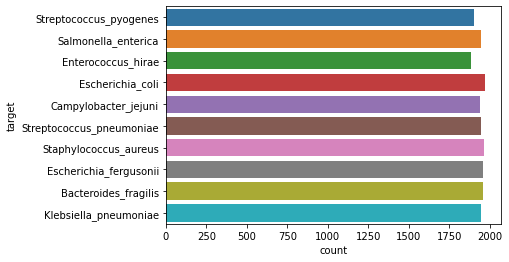

In [4]:
sns.countplot(y='target',data=raw_train)

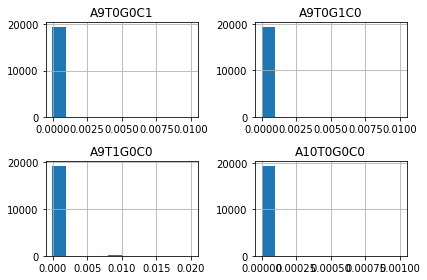

In [5]:
raw_train[raw_train.columns[-5:-1]].hist()
plt.tight_layout()

In [6]:
print("Total Samples: ", len(raw_train), "\nNaN Samples: ", len(raw_train.dropna()),
"\nBecause the difference is only one record, I will drop this one record before splitting the data and \npreparing it for analysis.")

Total Samples:  19421 
NaN Samples:  19420 
Because the difference is only one record, I will drop this one record before splitting the data and 
preparing it for analysis.


In [7]:
raw_train = raw_train.dropna()
train = raw_train.iloc[:,:-1].drop('row_id', axis=1)
test = raw_test.drop('row_id', axis=1)
target = raw_train.iloc[:,-1]

In [8]:
enc = LabelEncoder().fit(target)
target = enc.transform(target)

print(enc.classes_,target)

['Bacteroides_fragilis' 'Campylobacter_jejuni' 'Enterococcus_hirae'
 'Escherichia_coli' 'Escherichia_fergusonii' 'Klebsiella_pneumoniae'
 'Salmonella_enterica' 'Staphylococcus_aureus' 'Streptococcus_pneumoniae'
 'Streptococcus_pyogenes'] [9 6 6 ... 5 6 4]


### Model 1: Gaussian Mixture Model

In [9]:
# X_train, X_val, y_train, y_val = train_test_split()

ValueError: At least one array required as input

In [10]:
models = []

In [11]:
for train_index, test_index in StratifiedKFold(n_splits=9).split(train, target):
    knn = KNeighborsClassifier(n_neighbors=len(enc.classes_))
    knn.fit(train.loc[train_index], target[train_index])
    res = knn.predict(train.loc[test_index])
    models.append((knn, accuracy_score(target[test_index], res)))

In [12]:
models

[(KNeighborsClassifier(n_neighbors=10), 0.8424467099165894),
 (KNeighborsClassifier(n_neighbors=10), 0.8410565338276181),
 (KNeighborsClassifier(n_neighbors=10), 0.8317886932344764),
 (KNeighborsClassifier(n_neighbors=10), 0.8313253012048193),
 (KNeighborsClassifier(n_neighbors=10), 0.8229842446709916),
 (KNeighborsClassifier(n_neighbors=10), 0.8257645968489342),
 (KNeighborsClassifier(n_neighbors=10), 0.8141797961075069),
 (KNeighborsClassifier(n_neighbors=10), 0.8344923504867872),
 (KNeighborsClassifier(n_neighbors=10), 0.8349559573481687)]

In [13]:
model, result = models[0]
test_res = model.predict(test)

In [19]:
test_res_labeled = enc.inverse_transform(test_res)
final = pd.DataFrame(test_res_labeled, index=raw_test.row_id, 
                    columns=['target'])#.reset_index(col_fill='row_id')
final.index.name = 'row_id'

In [20]:
final.to_csv('/work/tabular-playground-series-feb-2022/submission.csv')

When this csv was uploaded to Kaggle, the results were 80% accurate. Although most of the models have a 90% accuracy score or above, this is a good benchmark model to continuing to work on this challenge until the February playground challenge! Excited to submit more results.

### Model 2: Random Forest

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45ed05e0-f62f-4c72-a058-9ea7964d8a5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>